In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import roc_auc_score

Read Data

In [2]:
X_train = pd.read_csv('data/train.csv', index_col='PassengerId')
X_test = pd.read_csv('data/test.csv', index_col='PassengerId')

In [3]:
X_train.shape

(891, 11)

In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [6]:
X_train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [7]:
X_train.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

Preprocessing: Combine Date

# Dividing the Features

In [8]:
categorical_cols = ["Pclass","Sex","SibSp", "Parch","Embarked"]
label_cols = []
numerical_cols = ["Age","Fare"]
i=0


# Data Distribution: Numerical

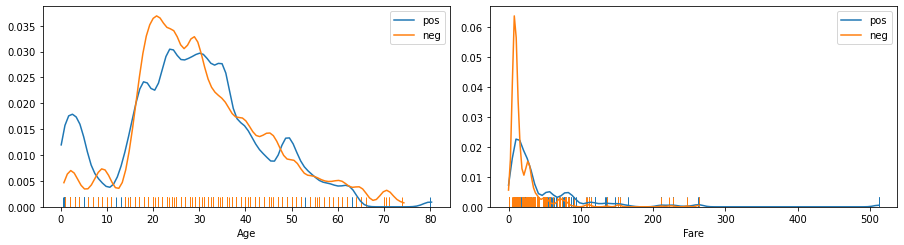

In [9]:
fig = plt.figure(figsize=(25,30))
for i in range(len(numerical_cols)):
    fig.add_subplot(9,4,i+1)
    col = X_train[numerical_cols].iloc[:,i]
    pos = col[X_train.Survived == 1]
    neg = col[X_train.Survived == 0]
    sns.distplot(pos.dropna(), rug=True, hist=False, label='pos', kde_kws={'bw':0.1})
    sns.distplot(neg.dropna(), rug=True, hist=False, label='neg', kde_kws={'bw':0.1})
    
    plt.xlabel(X_train[numerical_cols].columns[i])
plt.tight_layout()
plt.show()

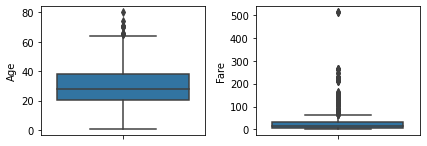

In [10]:
fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_cols)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=X_train[numerical_cols].iloc[:,i])

plt.tight_layout()
plt.show()

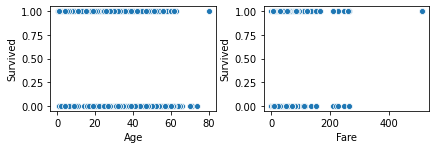

In [11]:
fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_cols)):
    fig.add_subplot(9, 4, i+1)
    sns.scatterplot(X_train[numerical_cols].iloc[:, i],X_train['Survived'])
plt.tight_layout()
plt.show()

# Data Distribution: Categorical

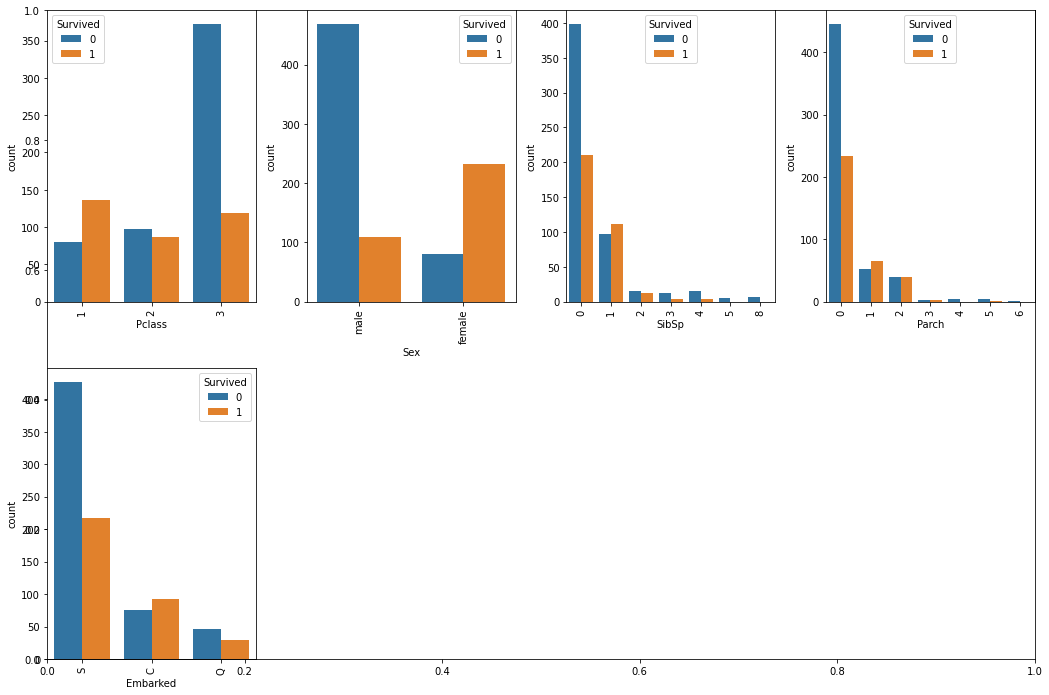

In [12]:
columns = len(categorical_cols)/4+1

fg, ax = plt.subplots(figsize=(15, 10))

for i, col in enumerate(categorical_cols):
    fg.add_subplot(columns, 4, i+1)
    sns.countplot(X_train[col],hue=X_train.Survived)
    plt.xlabel(col)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()




# Removing Outliers

# Removing Cols With High Missing Data 

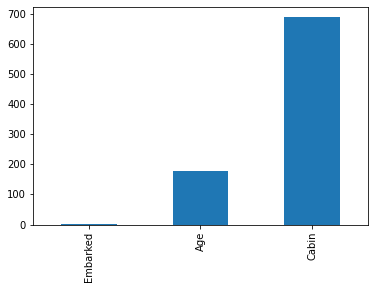

In [13]:
missing = X_train.isnull().sum()
missing = missing[missing>0]
missing.sort_values(inplace=True)
missing.plot.bar()

# Missing Data


In [14]:
X_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


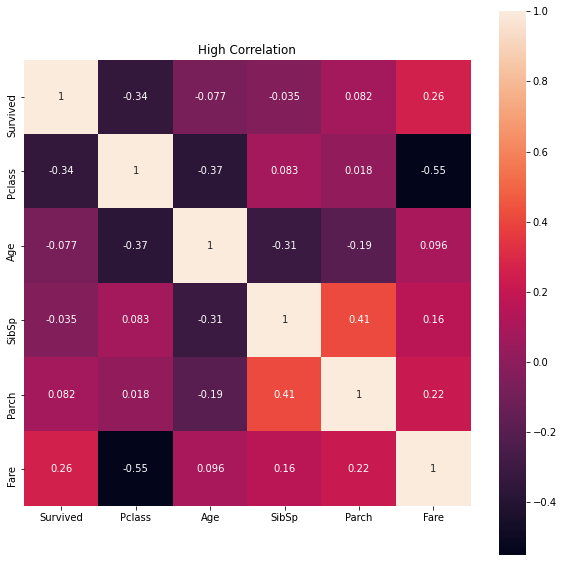

In [15]:
num_correlation = X_train.corr()
plt.figure(figsize=(10,10))
plt.title('High Correlation')
sns.heatmap(num_correlation, annot=True, square=True)

In [16]:
X_train['Age'] = X_train.groupby('Pclass')['Age'].apply(lambda x: x.fillna(x.median()))
X_test['Age'] = X_test.groupby('Pclass')['Age'].apply(lambda x: x.fillna(x.median()))

X_test['Fare'] = X_test.groupby('Pclass')['Fare'].apply(lambda x: x.fillna(x.median()))


In [17]:
X_train['Cabin'] = X_train['Cabin'].str[0]
X_train['Cabin'] = X_train['Cabin'].fillna('N')

X_test['Cabin'] = X_test['Cabin'].str[0]
X_test['Cabin'] = X_test['Cabin'].fillna('N')

In [18]:
X_train['Embarked'] = X_train['Embarked'].fillna(X_train['Embarked'].mode())
X_test['Embarked'] = X_test['Embarked'].fillna(X_test['Embarked'].mode())

In [19]:
X_test['Fare'] = X_test.groupby(['Pclass','Age'])['Fare'].apply(lambda x: x.fillna(x.median()))


# Feature Engineering

In [20]:
added_cols = []
# X_train['Fare_bin'],fare_bins = pd.qcut(X_train['Fare'], 12,  retbins=True, labels=False, duplicates = "drop")
# X_test['Fare_bin'] = pd.cut(X_test["Fare"], bins=fare_bins, labels=False, include_lowest=True)
# numerical_cols = list(set(numerical_cols)-set(["Fare"]))
# categorical_cols.append("Fare_bin")

In [21]:
X_train['Age_bin'],fare_bins = pd.qcut(X_train['Age'], 12,  retbins=True, labels=False, duplicates = "drop")
X_test['Age_bin'] = pd.cut(X_test["Age"], bins=fare_bins, labels=False, include_lowest=True)
numerical_cols = list(set(numerical_cols)-set(["Age"]))
categorical_cols.append("Age_bin")

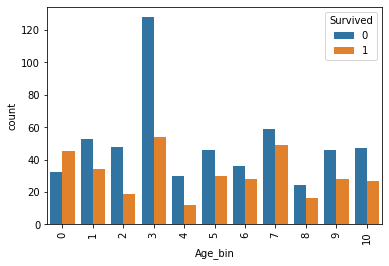

In [22]:
sns.countplot(X_train['Age_bin'],hue=X_train.Survived)
plt.xlabel('Age_bin')
plt.xticks(rotation=90)
plt.show()

In [23]:
# figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
# figure.set_size_inches(20,10)
# _ = sns.regplot(X_train['TotalBsmtSF'], X_train['SalePrice'], ax=ax1)
# _ = sns.regplot(X_train['2ndFlrSF'], X_train['SalePrice'], ax=ax2)
# _ = sns.regplot(X_train['TotalBsmtSF'] + X_train['2ndFlrSF'], X_train['SalePrice'], ax=ax3)


In [24]:
# X_train['TotalSF']=X_train['TotalBsmtSF']  + X_train['2ndFlrSF']
# X_test['TotalSF']=X_test['TotalBsmtSF']  + X_test['2ndFlrSF']
# added_cols.append("TotalSF")

In [25]:
# figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
# figure.set_size_inches(14,10)
# _ = sns.barplot(X_train['BsmtFullBath'], X_train['SalePrice'], ax=ax1)
# _ = sns.barplot(X_train['FullBath'], X_train['SalePrice'], ax=ax2)
# _ = sns.barplot(X_train['BsmtHalfBath'], X_train['SalePrice'], ax=ax3)
# _ = sns.barplot(X_train['BsmtFullBath'] + X_train['FullBath'] + X_train['BsmtHalfBath'] + X_train['HalfBath'], X_train['SalePrice'], ax=ax4)

In [26]:
# X_train['TotalBath']=X_train['BsmtFullBath'] + X_train['FullBath'] + (0.5*X_train['BsmtHalfBath']) + (0.5*X_train['HalfBath'])
# X_test['TotalBath']=X_test['BsmtFullBath'] + X_test['FullBath'] + X_test['BsmtHalfBath'] + X_test['HalfBath']
# added_cols.append("TotalBath")

# X_train['Porch_SF'] = (X_train['OpenPorchSF'] + X_train['3SsnPorch'] + X_train['EnclosedPorch'] + X_train['ScreenPorch'] + X_train['WoodDeckSF'])
# X_test['Porch_SF'] = (X_test['OpenPorchSF'] + X_test['3SsnPorch'] + X_test['EnclosedPorch'] + X_test['ScreenPorch'] + X_test['WoodDeckSF'])
# added_cols.append("Porch_SF")

In [27]:
# X_train['Has2ndfloor'] = X_train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
# X_train['HasBsmt'] = X_train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
# X_train['HasFirePlace'] = X_train['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
# X_train['Has2ndFlr']=X_train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
# X_train['HasBsmt']=X_train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)

# X_test['Has2ndfloor'] = X_test['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
# X_test['HasBsmt'] = X_test['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
# X_test['HasFirePlace'] = X_test['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
# X_test['Has2ndFlr']=X_test['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
# X_test['HasBsmt']=X_test['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
# cols= ["Has2ndfloor",'HasBsmt','HasFirePlace','Has2ndFlr','HasBsmt']
# added_cols.extend(cols)

# Train / Test split. Cross Validation

In [28]:
# Remove rows with missing target, separate target from predictors
X_train.dropna(axis=0, subset=['Survived'], inplace=True)
y_train = X_train.Survived
# X_train.drop(['Survived'], axis=1, inplace=True)

# Break off validation set from training data
# X_train, X_valid, y_train, y_valid = train_test_split(X_full, y, 
#                                                                 train_size=0.8, test_size=0.2,
#

In [29]:
numerical_cols

[]

In [30]:
my_cols = categorical_cols + label_cols + numerical_cols + added_cols
print(len(my_cols))

# Keep selected columns only
X_train_1 = X_train[my_cols].copy()
# X_valid = X_valid_full[my_cols].copy()
X_test_1 = X_test[my_cols].copy()

7


In [31]:
X_test_1.head()

,Pclass,Sex,SibSp,Parch,Embarked,Fare_bin,Age_bin
PassengerId,,,,,,,
892,3,male,0,0,Q,2,7.0
893,3,female,1,0,S,0,9.0
894,2,male,0,0,Q,4,10.0
895,3,male,0,0,S,3,5.0
896,3,female,1,1,S,5,2.0


# Builing the Pipeline

In [32]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant',fill_value=0)

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

label_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant')),
    ('label', OrdinalEncoder())
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
        ('lbl', label_transformer, label_cols)
    ])

# Selecting the Model

In [33]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.datasets import make_moons, make_circles, make_classification
# from sklearn.neural_network import MLPClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.gaussian_process.kernels import RBF
# from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [41]:
#     KNeighborsClassifier(3), 70
#     SVC(kernel="linear", C=0.025),76
#     SVC(gamma=2, C=1),54
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
#     DecisionTreeClassifier(max_depth=5),78
# RandomForestClassifier(max_depth=5, n_estimators=110, max_features=1),75
#     MLPClassifier(alpha=1, max_iter=1000),78
#     AdaBoostClassifier(),78
#     GaussianNB(),
#     QuadraticDiscriminantAnalysis()]
    
#     80
RandomForestClassifier(criterion='gini',
                                           n_estimators=1750,
                                           max_depth=7,
                                           min_samples_split=6,
                                           min_samples_leaf=6,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=1,
                                           n_jobs=-1,
                                           verbose=1) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=1750,
                       n_jobs=-1, oob_score=True, random_state=1, verbose=1,
                       warm_start=False)

In [42]:
# model = QuadraticDiscriminantAnalysis()

In [43]:
# # from lightgbm import LGBMClassifier
# model = LGBMClassifier()

In [44]:
# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

# Training the Model

In [45]:
from sklearn.model_selection import cross_val_predict
# scores = -1 * cross_val_score(clf, X_train_1, y_train,
#                               cv=5,
#                               scoring='neg_mean_absolute_error')
oof_pred = cross_val_predict(clf, 
                             X_train_1, 
                             y_train, 
                             cv=5,
                             method="predict")
print("Cross validation AUC {:.4f}".format(roc_auc_score(y_train, oof_pred)))
# base - 80.45 - 22k
# MV - Age (group-Pclass) -81.56

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 856 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 1100 out of 1100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 856 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    0.5s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBac

Cross validation AUC 0.7746


# Test Predictions

In [39]:
clf.fit(X_train_1, y_train)

# Preprocessing of test data, fit model
preds_test = clf.predict(X_test_1)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    1.1s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 1100 out of 1100 | elapsed:    0.2s finished


Run the next code cell without changes to save your results to a CSV file that can be submitted directly to the competition.

In [40]:
# Save test predictions to file
output = pd.DataFrame({'PassengerId': X_test.index,
                       'Survived': preds_test})
output.to_csv('submission.csv', index=False)